# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 10

### Wstęp

Firma produkująca produkty mleczne posiada kilka zamówień do realizacji. Dane są zaprezentowane poniżej.

### Dane

**Ceny składników:**

| Składnik     | Cena (PLN) |
| :---         | ---: |
| Mleko (l)    | 3.5 |
| Cukier (kg)  | 5   |
| Kakao (100g) | 8   |
| Sól (kg)     | 2   |


**Składniki zapisane są w tabeli poniżej:**

| Prod.\Skł.| Mleko (l) | Cukier (kg)  | Kakao (100g) | Sól (kg)    |
| :---      |      ---: |         ---: |         ---: |        ---: |
| Masło     | 5         | 0            | 0            | 0           |
| Czekolada | 1         | 0.1          | 5            | 0.01        |
| Ser żółty | 10        | 0            | 0            | 0.05        |
| Twaróg    | 2         | 0            | 0            | 0.1         |


**Zamówienia klientów:**

| Klient\Prod.| Masło | Czekolada | Ser żółty | Twaróg |
| :---        |  ---: |      ---: |      ---: |   ---: |
| Klient 1    | 10    | 50        | 5         | 5      |
| Klient 2    | 120   | 90        | 15        | 25     |
| Klient 3    | 0     | 10        | 1         | 1      |


> **Uwaga**: Możesz użyć funkcji `plt.table` do wyświetlenia tabeli z wynikami.

> Informacja: Powyższe dane są przykładowe i nie mają przełożenia na faktyczne dane rynkowe.

### Zadanie 1

Korzystając z operacji macierzowych oblicz i odpowiedz na pytania:

#### A) Jaki jest koszt wyprodukowania każdego z produktów?






 

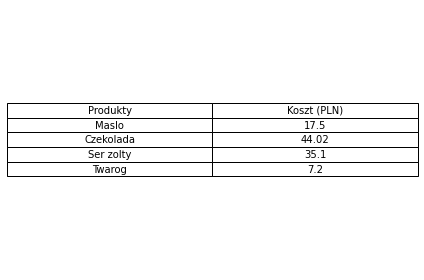

In [65]:
# >>> UZUPEŁNIJ <<<
import numpy
import numpy as np
import matplotlib.pyplot as plt

header = np.array(['Prod.\Skł.', 'Mleko (l)', 'Cukier (kg)', 'Kakao (100g)', 'Sól (kg)'])
inf_column = np.array(['Maslo', 'Czekolada', 'Ser zolty', 'Twarog']).T
costs = np.array([[3.5, 5, 8, 2]])
ingredients = np.array([
[5, 0, 0, 0],
[1,0.1,5,0.01],
[10, 0, 0, 0.05],
[2, 0, 0, 0.1]])
result = ingredients @ costs.T

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

test = []
for i in range(len(result)):
    test.append((inf_column[i], float(result[i])))

ax.table(cellText=test, colLabels=['Produkty', 'Koszt (PLN)'], cellLoc='center', loc='center')

fig.tight_layout()


#### B) Ile składników zostanie uzytych na realizację zamówień klientów (każdego osobno i łącznie)?



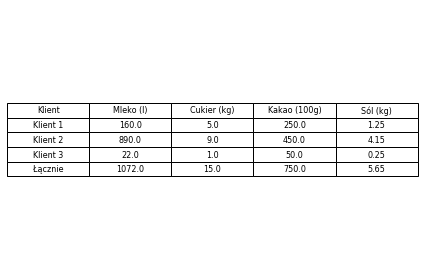

In [66]:
# >>> UZUPEŁNIJ <<<

client_col = np.array(['Klient 1', 'Klient 2', 'Klient 3', 'Łącznie'])

order = np.array([
    [10, 50, 5, 5],
    [120, 90, 15, 25],
    [0, 10, 1, 1]
])

ingredients_use = order @ ingredients
sums = ingredients_use.sum(axis=0).T
ingredients_result = np.column_stack((client_col.T, np.vstack((ingredients_use, sums))))
ingredients_result
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


ax.table(cellText=ingredients_result, colLabels=['Klient', 'Mleko (l)', 'Cukier (kg)', 'Kakao (100g)', 'Sól (kg)'], cellLoc='center', loc='center')

fig.tight_layout()

#### C) Zakładając marżę $30\%$ (pomijając wszystkie inne czynniki), ile klienci będą musieli zapłacić za zrealizowanie zamówienia?



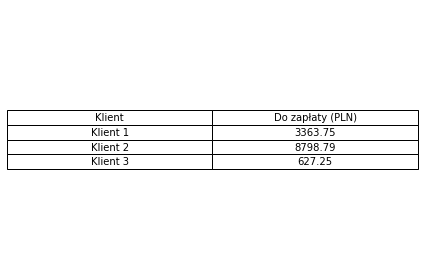

In [67]:
# >>> UZUPEŁNIJ <<<

order_value = order @ result * 1.30

order_value = np.column_stack((client_col[:-1].T, np.round(order_value, 2)))

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=order_value, colLabels=['Klient', 'Do zapłaty (PLN)'], cellLoc='center', loc='center')

fig.tight_layout()

#### D) Jaki jest łączny koszt składników jakie należy zamówić, aby zrealizować wszystkie zamówienia klientów?




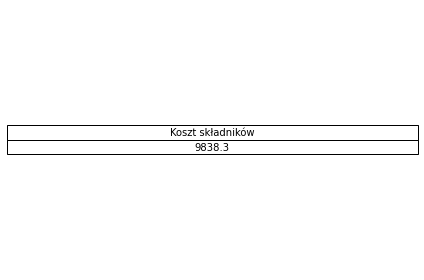

In [68]:
# >>> UZUPEŁNIJ <<<
total_value = np.array([[(order @ result).sum()]])

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=total_value, colLabels=['Koszt składników'], cellLoc='center', loc='center')

fig.tight_layout()

### Zadanie 2

Napisać skrypt, który przyjmuje dwie macierze $A$ oraz $B$, a następnie wypisuje operacje wykonywane przy mnożeniu obu macierzy.

**Przykład:**

Wejście:

\begin{equation}
A = \begin{pmatrix}
1 & 2 & 1\\
4 & 4 & 5\\
6 & 7 & 7
\end{pmatrix}, 
 B = \begin{pmatrix}
-7 & -7 & 6\\
2 & 1 & -1\\
4 & 5 & -4
\end{pmatrix}
\end{equation}

Wyjście:

```
C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
```



In [69]:
# >>> UZUPEŁNIJ <<<

X = np.array([[1, 2, 1], [4, 4, 5], [6, 7, 7]])
Y = np.array([[-7, -7, 6], [2, 1, -1], [4, 5, -4]])


def manual_matrix_mul(A: np.array, B: np.array) -> np.array:
    am, an = A.shape
    bm, bn = B.shape

    if an != bm:
        raise ValueError("Matrix dimensions don't match")

    result_matrix = np.zeros(shape=(am, bn))

    for i in range(am):
        for j in range(bn):
            output = "C[" + str(i) + ", " + str(j) + "] = "
            for k in range(bm):
                result_matrix[i][j] += A[i][k] * B[k][j]
                first = str(A[i][k]) if A[i][k] >= 0 else "(" + str(A[i][k]) + ")"
                second = str(B[k][j]) if B[k][j] >= 0 else "(" + str(B[k][j]) + ")"
                output += first + " * " + second + " + "
            output = output[:-2] + " = " + str(result_matrix[i][j])
            print(output)

    return result_matrix


X = np.array([[1, 2, 1], [4, 4, 5], [6, 7, 7]])
Y = np.array([[-7, -7, 6], [2, 1, -1], [4, 5, -4]])

manual_matrix_mul(X, Y)

C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4  = 1.0
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5  = 0.0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4)  = 0.0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4  = 0.0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5  = 1.0
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4)  = 0.0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4  = 0.0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5  = 0.0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4)  = 1.0


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])